## Credit Card Fraud Detection

In this project  we'll predict fraudulent credit card transactions with the help of Machine learning models.
Importing few libraries to get started.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
# Loading and checking the first five rows of data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Total count of rows and columns
df.shape

(284807, 31)

In [5]:
# Data types of every columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# Checking the count of null values across columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values present in the data.

Also we cannot check for duplicates as our data doesn't have any unique identifier.

Here we will observe the distribution of our classes

In [7]:
# Distribution of non-frauds - frauds
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


We've a highly imbalance dataset were fraud cases are just 0.17%

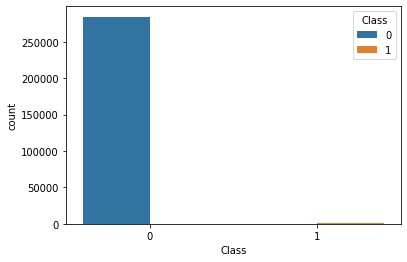

In [8]:
# Bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(data = df,x ='Class', hue = 'Class')
plt.show()

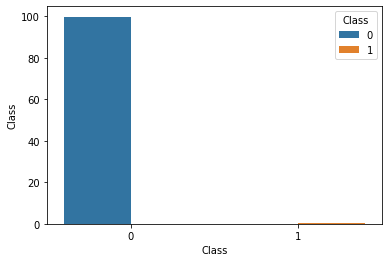

In [9]:
sns.barplot(data = df, x = 'Class', y = 'Class',hue = 'Class', estimator = lambda x: len(x)/len(df)*100)
plt.show()

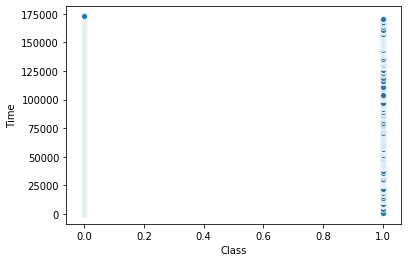

In [10]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x = 'Class', y = 'Time', data = df)
plt.show()

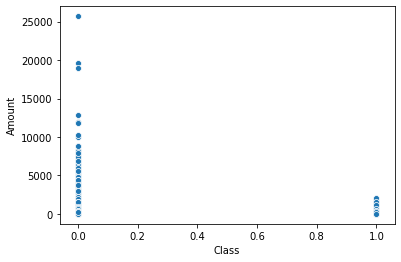

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x = 'Class', y = 'Amount', data = df)
plt.show()

In [12]:
# Dropping 'Time' column as it denotes the time of transaction from the first transaction
# and has no relation with the outcome
df.drop(['Time'], axis = 1, inplace = True)

### Splitting the data into train & test data

In [13]:
# Dividing the data into independent and dependent dataframes
y= df['Class']
X = df.drop(['Class'], axis = 1)

In [14]:
# Importing library to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y , train_size = 0.7, test_size = 0.3, random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
dependent_test = X_test.copy()
independent_test = y_test.copy()
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


#### Scaling

In [16]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# Scaling 'Amount' feature
var = ['Amount']
X_train[var] = scaler.fit_transform(X_train[var])
X_test[var] = scaler.transform(X_test[var])

### Plotting the distribution of a variable

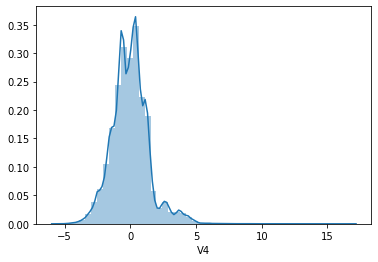

In [18]:
# histogram of a variable from the dataset to see the skewness
sns.distplot(df['V4'])

In [19]:
# Dropping 'Class' feature
col = df.drop(['Class'], axis = 1)

In [20]:
# Storing column headers
cols = col.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [21]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_yeo = pt.fit_transform(X_train)
X_test_yeo = pt.transform(X_test)

In [22]:
X_train_pt = pd.DataFrame(data = X_train_yeo, columns = cols)
X_test_pt = pd.DataFrame(data = X_test_yeo, columns = cols)

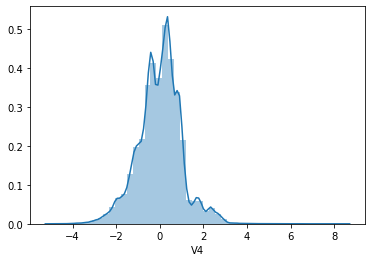

In [23]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(X_train_pt['V4'])

## Model Building
- Build different models on the imbalanced dataset and see the result

In [24]:
# Logistic Regression
# Importing the various packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Defining regularisation parameters
num_C = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}

# Defining total number of folds
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [25]:
# Initiating algorithm
model = LogisticRegression()

# Defining cross-validation module
model_cv = GridSearchCV(estimator = model, param_grid = num_C, scoring = 'recall', cv = cv_num,
                       return_train_score = True, verbose = 1, n_jobs = -1)

# Fitting data on the algorithm
model_cv.fit(X_train_pt, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   19.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [26]:
# Best recall score and hyperparameters
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print('The highest train recall is {0} at {1}'.format(best_score, best_param))

The highest train recall is 0.6771099744245525 at {'C': 1.0, 'penalty': 'l2'}


In [27]:
# Selecting the best hyperparameters
model1 = LogisticRegression(C = 1.0, penalty = 'l2', n_jobs = -1)

# Applying the algorithm
model1.fit(X_train_pt, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predict on training data
y_train_pred = model1.predict(X_train_pt)

# Classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.89      0.67      0.77       344

    accuracy                           1.00    199364
   macro avg       0.94      0.84      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [29]:
# Predictions on test data
y_test_pred = model1.predict(X_test_pt)

# Classification report on test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.63      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



#### Random Forest

In [30]:
# Importing required library
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

# hyperparameter space
params = {'max_depth':[5,10], 'min_samples_leaf':[50,100], 'min_samples_split':[50,100], 
          'n_estimators':[100,300], 'max_features':[5,10]}

# creating gridsearch object
rf = GridSearchCV(estimator = forest, cv = 5, param_grid = params, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [31]:
# Since below code took more than a day and still did not get completed, we have kept it aside
# fitting the model
# rf.fit(X_train_pt, y_train)

In [32]:
# to find the best hyperparameters above fit code is mandatory
# Best AUC and hyperparameters
# print('Best AUC:',rf.best_score_)
# print('Best hyperparameters:',rf.best_params_)

In [33]:
# Re-iterate the above three steps to find the optimal model by updating the hyperparameters
# create a new model using the best hyperparameters collected from above code
clf = RandomForestClassifier(bootstrap = True,
                            max_depth = 20,
                            max_features = 20,
                            min_samples_leaf = 100,
                            min_samples_split = 100,
                            n_estimators = 600,
                            n_jobs = -1,
                            random_state = 100,
                            verbose = 1)

In [34]:
# Applying model
clf.fit(X_train_pt, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 27.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=1,
                       warm_start=False)

In [35]:
# Predictions on test data
y_test_pred = clf.predict(X_test_pt)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    2.3s finished


In [36]:
# Predictions on training data
y_train_pred = clf.predict(X_train_pt)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.2s finished


In [37]:
# Classification report on training data
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.82      0.67      0.74       344

    accuracy                           1.00    199364
   macro avg       0.91      0.83      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [38]:
# Classification report on test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.66      0.69       148

    accuracy                           1.00     85443
   macro avg       0.86      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



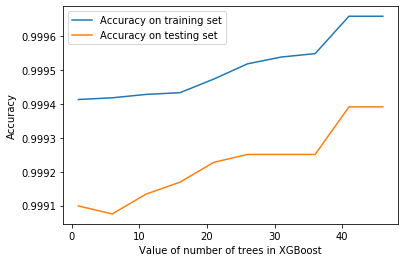

In [39]:
# XGBoost
# Importing library
from xgboost import XGBClassifier

tree_range = range(1, 50, 5)
score1 = []
score2 = []
for tree in tree_range:
    xgb = XGBClassifier(n_estimators = tree)
    xgb.fit(X_train_pt, y_train)
    score1.append(xgb.score(X_train_pt, y_train))
    score2.append(xgb.score(X_test_pt, y_test))
    
%matplotlib inline
plt.plot(tree_range, score1, label = 'Accuracy on training set')
plt.plot(tree_range, score2, label = 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [40]:
clf = XGBClassifier(n_estimators = 40)
clf.fit(X_train_pt, y_train)
print('Accuracy of xgb on the testing data is :{:.3f}'.format(clf.score(X_test_pt, y_test)))

Accuracy of xgb on the testing data is :0.999


In [41]:
# Predictions on train set
y_train_pred = clf.predict(X_train_pt)

# Classification report on train set
print(classification_report(y_train, y_train_pred))

# Predictions on test set
y_test_pred = clf.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.82      0.86       344

    accuracy                           1.00    199364
   macro avg       0.95      0.91      0.93    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.73      0.77       148

    accuracy                           1.00     85443
   macro avg       0.91      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


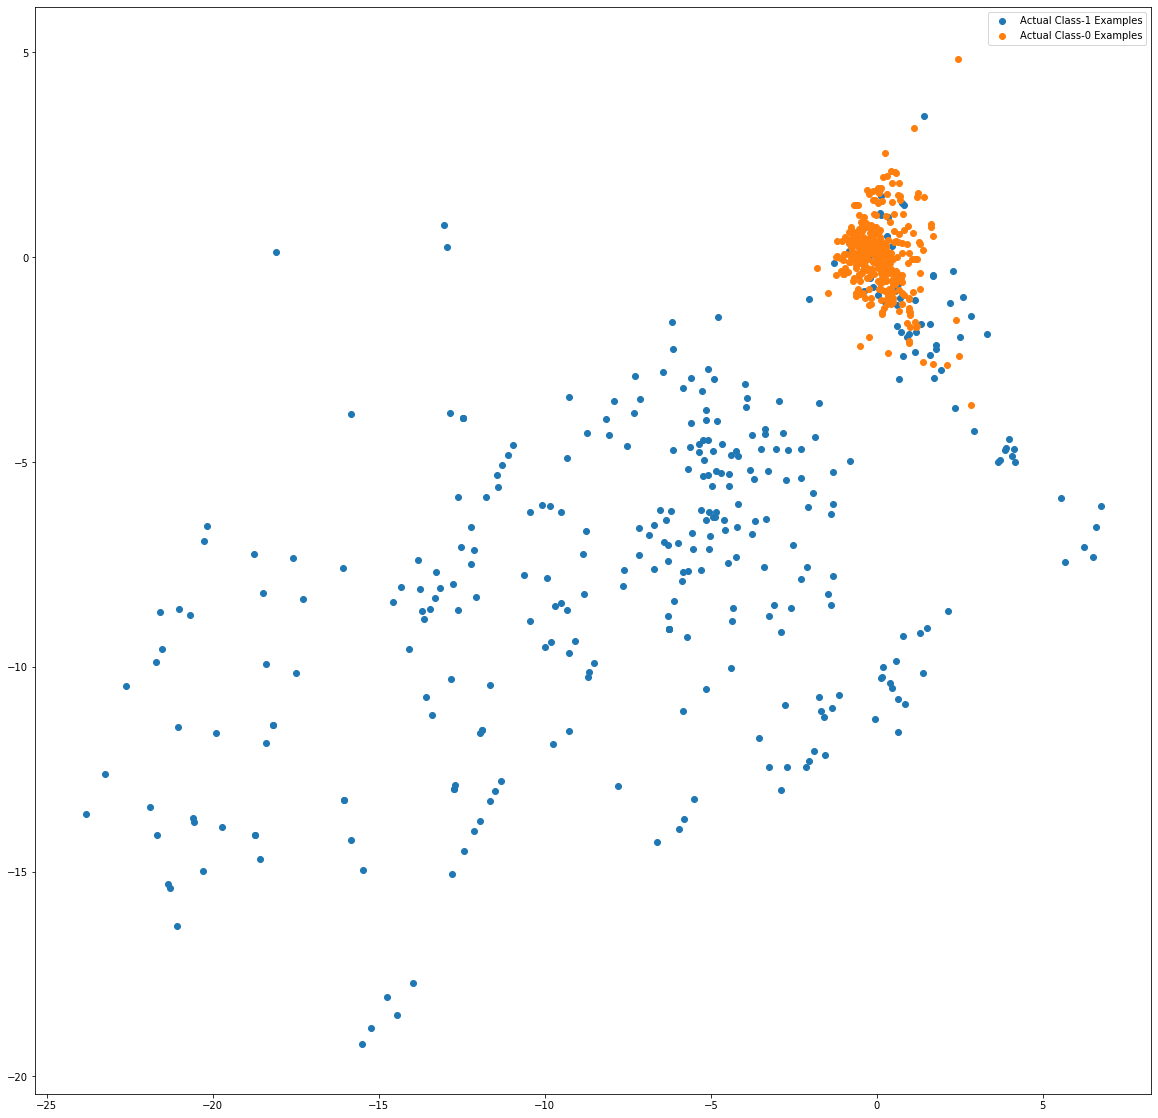

In [42]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [43]:
# Logistic Regression
logm = LogisticRegression()

num_C = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [44]:
# importing over sampling package
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state= 42)

# Applying over sampling
X_train_ros, y_train_ros = ros.fit_resample(X_train_pt, y_train)

Using TensorFlow backend.


In [45]:
# Defining cross-validation module
logm_cv = GridSearchCV(estimator = logm, param_grid = num_C, scoring = 'recall', cv = cv_num,
                       return_train_score = True, verbose = 1, n_jobs = -1)

# Fitting data on the algorithm
logm_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   39.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [46]:
# Best recall score and hyperparameters
best_score = logm_cv.best_score_
best_param = logm_cv.best_params_

print('The highest train recall is {0} at {1}'.format(best_score, best_param))

The highest train recall is 0.9290523565470806 at {'C': 0.01, 'penalty': 'l2'}


In [47]:
# Defining model with optimal hyperparameters
logm1 = LogisticRegression(C = 0.01, penalty = 'l2')

# Fitting the model
logm1.fit(X_train_ros, y_train_ros)

# Prediction on training data
y_train_pred = logm1.predict(X_train_ros)

# Classification report on training data
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [48]:
# Predictions on test set
y_test_pred = logm1.predict(X_test_pt)

# Classification report on testing data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



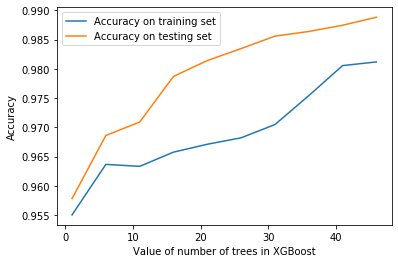

In [49]:
# XGBoost

tree_range = range(1, 50, 5)
score1 = []
score2 = []
for tree in tree_range:
    xgb = XGBClassifier(n_estimators = tree)
    xgb.fit(X_train_ros, y_train_ros)
    score1.append(xgb.score(X_train_ros, y_train_ros))
    score2.append(xgb.score(X_test_pt, y_test))
    
%matplotlib inline
plt.plot(tree_range, score1, label = 'Accuracy on training set')
plt.plot(tree_range, score2, label = 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
clf = XGBClassifier(n_estimators = 50)
clf.fit(X_train_ros, y_train_ros)
print('Accuracy of xgb on the testing data is :{:.3f}'.format(clf.score(X_test_pt, y_test)))

Accuracy of xgb on the testing data is :0.989


In [51]:
# Predictions on train data
y_train_pred = clf.predict(X_train_ros)

# Classification report
print(classification_report(y_train_ros, y_train_pred))

# Predictions on test data
y_test_pred = clf.predict(X_test_pt)

# Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    199020
           1       0.99      0.98      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.86      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



With OverSampling technique, it's the Logistic Regression which performs better while XGBoost is also good. However we're looking for a better recall score which is given by Logistic Regression.

### Print the class distribution after applying SMOTE 

In [52]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Initiating the algorithm
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)

In [53]:
y_train_smote.value_counts()

1    199020
0    199020
Name: Class, dtype: int64

We can see that post applying smote to our training data, we've equal number of both the cases.

In [54]:
log_sm = LogisticRegression()

num_C = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [55]:
# Defining cross-validation module
log_sm_cv = GridSearchCV(estimator = log_sm, param_grid = num_C, scoring = 'recall', cv = cv_num,
                       return_train_score = True, verbose = 1, n_jobs = -1)

# Fitting data on the algorithm
log_sm_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   37.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [56]:
# Best recall score and hyperparameters
best_score = log_sm_cv.best_score_
best_param = log_sm_cv.best_params_

print('The highest train recall is {0} at {1}'.format(best_score, best_param))

The highest train recall is 0.9263591598834289 at {'C': 10.0, 'penalty': 'l2'}


In [57]:
# Defining model with optimal hyperparameters
log_sm1 = LogisticRegression(C = 10, penalty = 'l2')

# Fitting the model
log_sm1.fit(X_train_smote, y_train_smote)

# Prediction on training data
y_train_pred = log_sm1.predict(X_train_smote)

# Classification report on training data
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [58]:
# Predictions on test set
y_test_pred = log_sm1.predict(X_test_pt)

# Classification report on testing data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



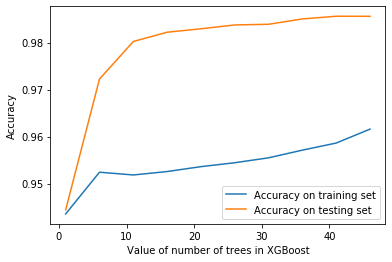

In [59]:
# XGBoost

tree_range = range(1, 50, 5)
score1 = []
score2 = []
for tree in tree_range:
    xgb = XGBClassifier(n_estimators = tree)
    xgb.fit(X_train_smote, y_train_smote)
    score1.append(xgb.score(X_train_smote, y_train_smote))
    score2.append(xgb.score(X_test_pt, y_test))
    
%matplotlib inline
plt.plot(tree_range, score1, label = 'Accuracy on training set')
plt.plot(tree_range, score2, label = 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [60]:
clf = XGBClassifier(n_estimators = 7)
clf.fit(X_train_smote, y_train_smote)
print('Accuracy of xgb on the testing data is :{:.3f}'.format(clf.score(X_test_pt, y_test)))

Accuracy of xgb on the testing data is :0.972


In [61]:
# Predictions on train data
y_train_pred = clf.predict(X_train_smote)

# Classification report
print(classification_report(y_train_smote, y_train_pred))

# Predictions on test data
y_test_pred = clf.predict(X_test_pt)

# Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.88      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



We still see that Logistic Regression is performing better than XGBoost though marginally

### Print the class distribution after applying ADASYN

In [62]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)

In [63]:
y_train_adasyn.value_counts()

0    199020
1    198982
Name: Class, dtype: int64

In [64]:
log_ad = LogisticRegression()

num_C = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [65]:
# Defining cross-validation module
log_ad_cv = GridSearchCV(estimator = log_ad, param_grid = num_C, scoring = 'recall', cv = cv_num,
                       return_train_score = True, verbose = 1, n_jobs = -1)

# Fitting data on the algorithm
log_ad_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   39.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [66]:
# Best recall score and hyperparameters
best_score = log_ad_cv.best_score_
best_param = log_ad_cv.best_params_

print('The highest train recall is {0} at {1}'.format(best_score, best_param))

The highest train recall is 0.8818536450110201 at {'C': 1000.0, 'penalty': 'l2'}


In [67]:
# Defining model with optimal hyperparameters
log_ad1 = LogisticRegression(C = 1000, penalty = 'l2')

# Fitting the model
log_ad1.fit(X_train_adasyn, y_train_adasyn)

# Prediction on training data
y_train_pred = log_ad1.predict(X_train_adasyn)

# Classification report on training data
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    199020
           1       0.91      0.88      0.89    198982

    accuracy                           0.90    398002
   macro avg       0.90      0.90      0.90    398002
weighted avg       0.90      0.90      0.90    398002



In [68]:
# Predictions on test set
y_test_pred = log_ad1.predict(X_test_pt)

# Classification report on testing data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.93      0.03       148

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.91      0.95     85443



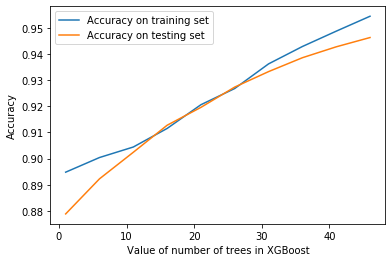

In [69]:
# XGBoost

tree_range = range(1, 50, 5)
score1 = []
score2 = []
for tree in tree_range:
    xgb = XGBClassifier(n_estimators = tree)
    xgb.fit(X_train_adasyn, y_train_adasyn)
    score1.append(xgb.score(X_train_adasyn, y_train_adasyn))
    score2.append(xgb.score(X_test_pt, y_test))
    
%matplotlib inline
plt.plot(tree_range, score1, label = 'Accuracy on training set')
plt.plot(tree_range, score2, label = 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [70]:
clf = XGBClassifier(n_estimators = 10)
clf.fit(X_train_adasyn, y_train_adasyn)
print('Accuracy of xgb on the testing data is :{:.3f}'.format(clf.score(X_test_pt, y_test)))

Accuracy of xgb on the testing data is :0.893


In [71]:
# Predictions on train data
y_train_pred = clf.predict(X_train_adasyn)

# Classification report
print(classification_report(y_train_adasyn, y_train_pred))

# Predictions on test data
y_test_pred = clf.predict(X_test_pt)

# Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90    199020
           1       0.89      0.91      0.90    198982

    accuracy                           0.90    398002
   macro avg       0.90      0.90      0.90    398002
weighted avg       0.90      0.90      0.90    398002

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     85295
           1       0.01      0.91      0.03       148

    accuracy                           0.89     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.89      0.94     85443



### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 14
3rd Top var = 7


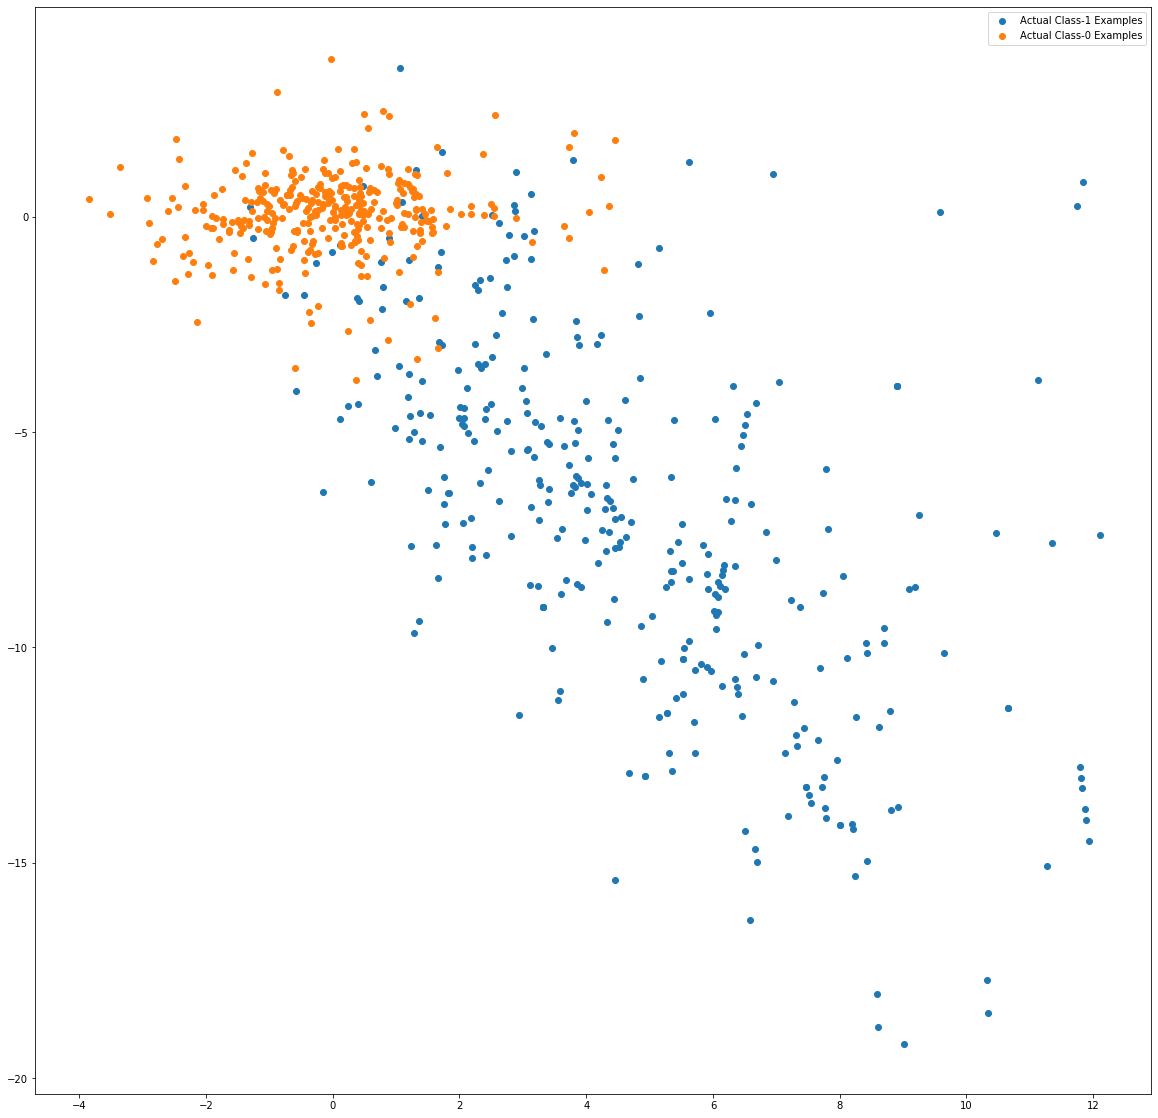

In [72]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [73]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print(confusion_matrix(y_test, y_test_pred))

# Importing packages
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[76197  9098]
 [   14   134]]
Sensitivity: 	0.91
Specificity: 	0.89


In [74]:
# Calculating ROC score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print('Train auc =', roc_auc_score(y_train_adasyn, y_train_pred))

Train auc = 0.901476413295599


In [75]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred, pos_label = 2)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

2


In [102]:
# Converting the y_test values to dataframe
Predicted = pd.Series(y_test_pred)
Outcome = pd.DataFrame(Predicted)
Outcome.reset_index(drop=True, inplace=True)

In [103]:
# Concatenating the X_test and y_test
final = pd.concat([dependent_test, independent_test], axis = 1)
final.reset_index(drop=True, inplace = True)
final.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,...,0.316647,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,101.42,0
1,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,...,-0.077049,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,9.99,0
2,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,...,0.261879,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,10.49,0
3,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,...,-0.280792,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,1.00,0
4,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,...,0.081319,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,227.75,0


In [108]:
# Concatenating Predictions
final1 = pd.concat([final, Outcome.rename(columns = {0:'Prediction'})], axis = 1)
final1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Prediction
0,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,...,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,101.42,0,1
1,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,...,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,9.99,0,1
2,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,...,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,10.49,0,0
3,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,...,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,1.00,0,0
4,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,...,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,227.75,0,0


In [115]:
# Importing the test data alongwith actuals and predictions to csv file
final1.to_csv(r'/Users/rishabhkashyap/Downloads/final.csv', index = False)

### Cost Benefit Analysis

Total fraud predictions made by the model = (14 + 134) = 148

Cost beared by the bank to verify all the predictions =  (85,443 * 10 INR) = 8,54,430 INR

Savings = 134 * 10 = 1,340 INR

Loss = 14 * 10 = 140 INR

Total Savings = 1,340 - ((148 * 10) + 140) = 1,340 - (1,480 + 140) = 1,340 - 1620 = -280 INR